<a href="https://colab.research.google.com/github/Ilhammkt/Machine-Learning/blob/main/8thTask/Ilham_Khodar_Trijaya_SVM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama    : Ilham Khodar Trijaya

NIM     : 1103213084

Tugas  : SVM Model Week 8

Dataset : heart_failure_clinical_records_dataset.csv

Dokumentasi ChatGPT : https://chat.openai.com/share/b3798dcc-7ab8-455c-934b-74a12069a09c

**PROMPT CHATGPT IMPORT DRIVE** : berikan kode python untuk mengubungkan drive pada google colab

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
#1 Impor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
#2 Membaca dataset dari CSV
file_path = "/content/drive/MyDrive/Dataset/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(file_path)

In [10]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [15]:
#3 Exploratory data analysis
print(data.head())  # Cek lima baris pertama data
print(data.describe())  # Deskripsi statistik data

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

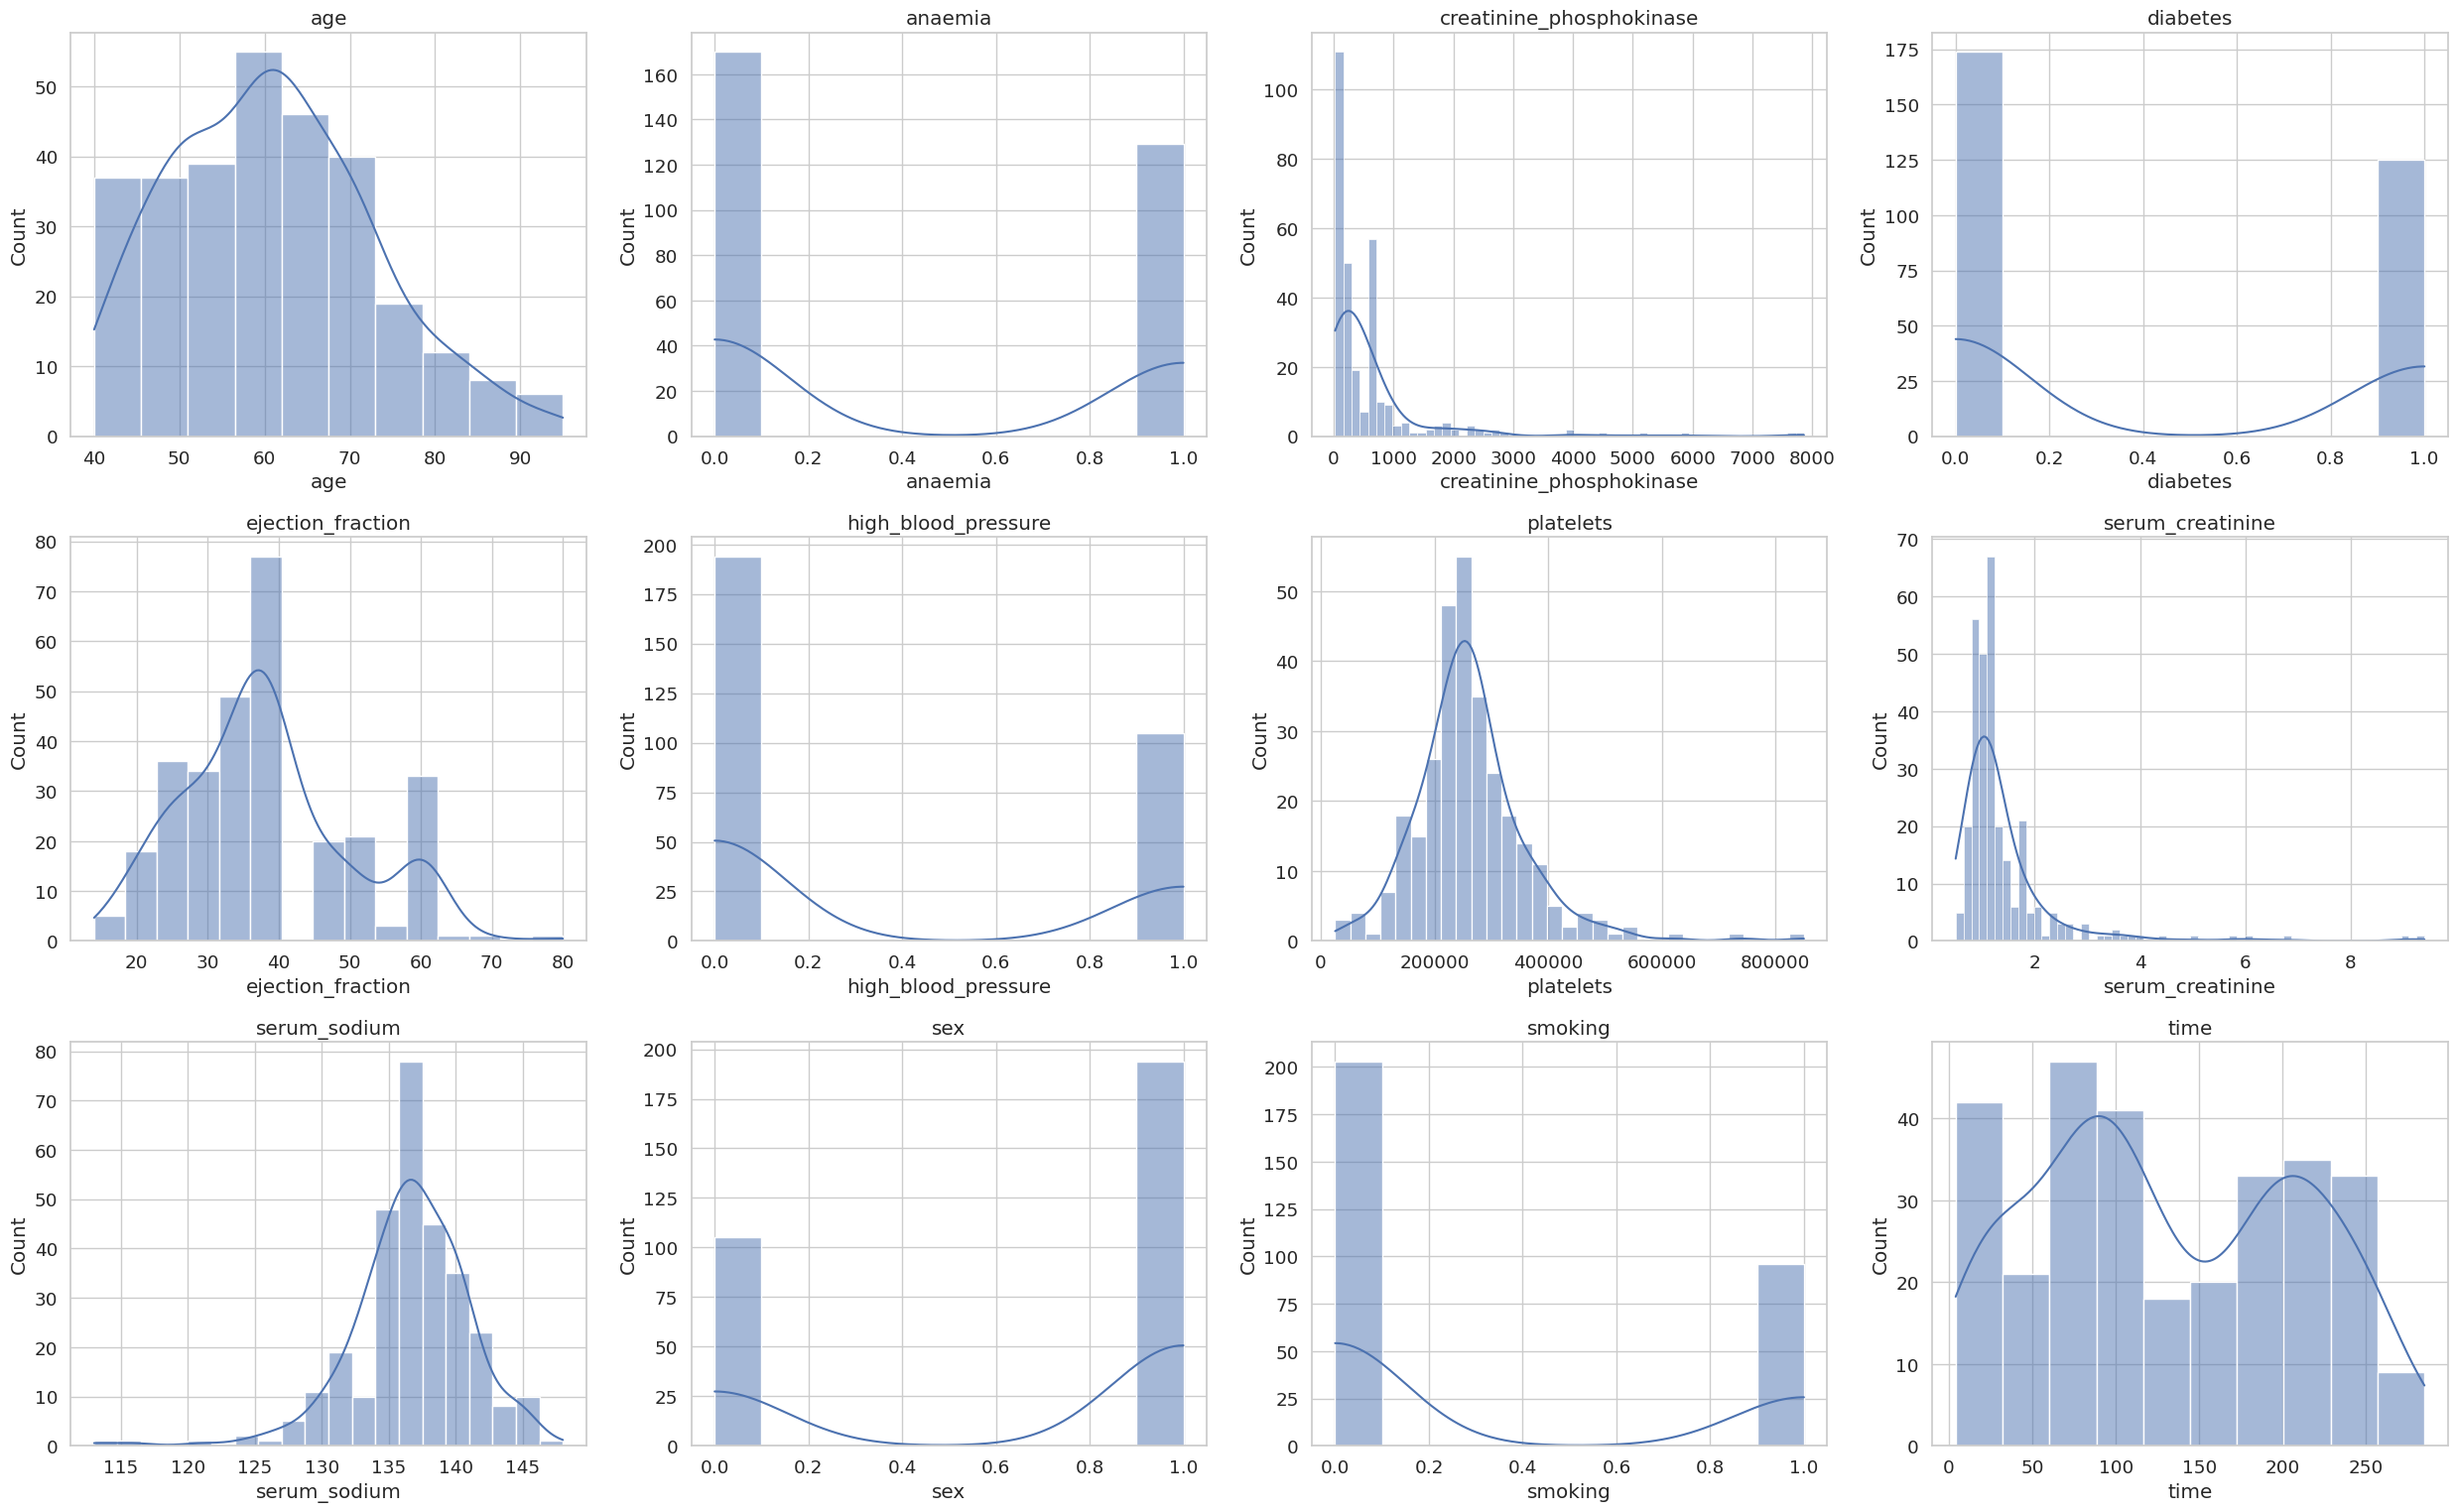

In [18]:
#4 Visualisasi distribusi data setiap feature
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(25, 20))
n_columns = 4
n_rows = (len(data.columns) - 1) // n_columns + 1
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(n_rows, n_columns, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

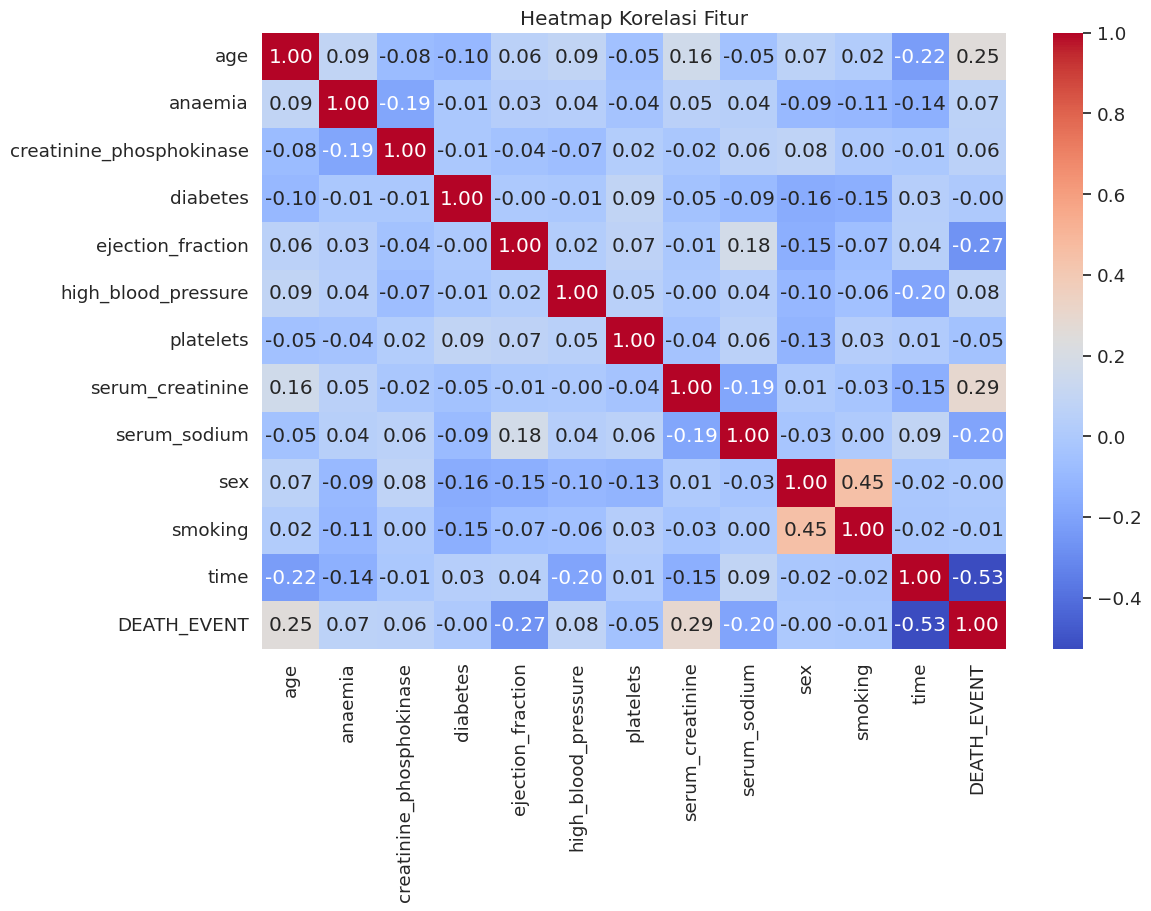

In [20]:
#5 Visualisasi heatmap tiap fitur
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [21]:
#6 Memisahkan fitur dan target
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

#7 Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#8 Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#9 Membuat dan melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

#10 Memprediksi menggunakan model yang telah dilatih
y_pred = svm_model.predict(X_test_scaled)

#11 Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi SVM:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi SVM: 0.8
Confusion Matrix:
[[33  2]
 [10 15]]
